#**Breast Cancer Detection**

## Importing Libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [3]:
from tensorflow.keras.utils import plot_model

In [6]:
bc = sklearn.datasets.load_breast_cancer()

## Pre-Processing the data

In [9]:
df = pd.DataFrame(bc.data,columns=bc.feature_names)
df['Target'] = bc.target

## Train Test Split

In [10]:
X = df.drop('Target',axis= 1)
y = df['Target']

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state=3)

## Standard Scalar

In [16]:
from sklearn.preprocessing import StandardScaler as SS
scalar = SS()

In [17]:
X_test_std = scalar.fit_transform(X_test)

In [18]:
X_train_std = scalar.fit_transform(X_train)

## Defining Compiling and fitting the model

In [22]:
# Defining the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape  = (30,)     ),
    keras.layers.Dense  (20, activation ='relu'   ),
    keras.layers.Dense  ( 2, activation ='sigmoid')
])

In [23]:
# Compiling the Model
model.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   =  ['accuracy']
)

In [24]:
# Fitting the Model
history = model.fit(X_train_std,y_train,validation_split=0.1,epochs=30)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2765 - loss: 1.1110 - val_accuracy: 0.3250 - val_loss: 1.1449
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4033 - loss: 0.8448 - val_accuracy: 0.5250 - val_loss: 0.9550
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6061 - loss: 0.6559 - val_accuracy: 0.7250 - val_loss: 0.8092
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7394 - loss: 0.5233 - val_accuracy: 0.8000 - val_loss: 0.6962
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8114 - loss: 0.4295 - val_accuracy: 0.8250 - val_loss: 0.6076
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8351 - loss: 0.3628 - val_accuracy: 0.8250 - val_loss: 0.5386
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8819 - loss: 0.3140 - val_accuracy: 0.8500 - val_loss: 0.4802
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9041 - loss: 0.2777 - val_accuracy: 0.8750 - val_loss

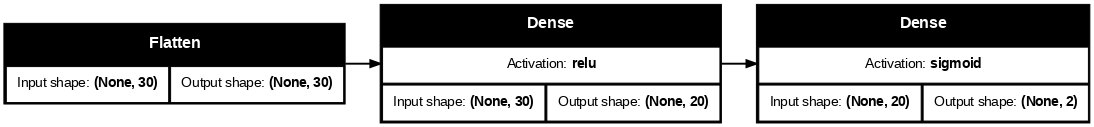

In [29]:
plot_model(model, dpi=70, rankdir="LR", show_shapes=True, show_layer_activations=True)

## Accuracy and Loss Plots

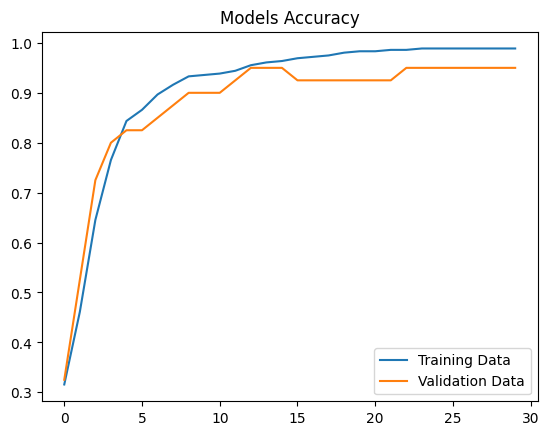

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Models Accuracy')
plt.legend(['Training Data','Validation Data'], loc = 'lower right')

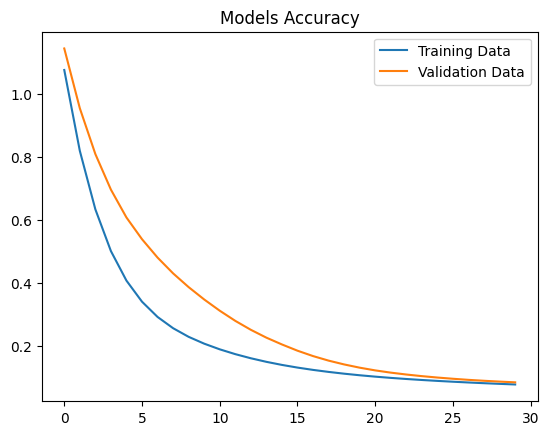

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models Accuracy')
plt.legend(['Training Data','Validation Data'], loc = 'upper right')

## Predicting the data

For Malignannt\
M,
20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678 \

M,
13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151






For Benaing,

B,
13.53,10.94,87.91,559.2,0.1291,0.1047,0.06877,0.06556,0.2403,0.06641,0.4101,1.014,2.652,32.65,0.0134,0.02839,0.01162,0.008239,0.02572,0.006164,14.08,12.49,91.36,605.5,0.1451,0.1379,0.08539,0.07407,0.271,0.07191

B,
12,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924



In [30]:
y_pred = model.predict(X_test_std)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [32]:
np.argmax(y_pred[0])

np.int64(1)

In [51]:
def detect_cancer(i):
  input_data = (i)
  id = scalar.transform(np.asanyarray(input_data).reshape(1,-1))
  prediction = model.predict(id)
  label = np.argmax(prediction)
  if label == 0 :
    print("The Tumor is Malignant")
  else :
    print("The Tumor is Benign")

In [55]:
print("Input of Benign Tumor and...")
detect_cancer((12,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924))

Input of Benign Tumor and...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The Tumor is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
print("Input of Malignant Tumor and...")
detect_cancer((13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151))


Input of Malignant Tumor and...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The Tumor is Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Accuracy and the Loss of the Model

In [57]:
loss, accuracy = model.evaluate(X_test_std,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9675 - loss: 0.0750 


In [59]:
loss*100, accuracy*100

(7.171447575092316, 97.07602262496948)